# Security & Privacy (CC2009) - 2023/2024

## ASSIGNMENT #1: Performance Benchmarking of Cryptographic Mechanisms

### Due date: March 22, 23:59
### Grading: Assignment #1 is worth 2 points

In this exercise you should measure the time AES, RSA and SHA take to process files of different sizes, using a
python implementation of the encryption/description and hash mechanisms.
Some notes:
- You should measure the time of cryptographic operations/algorithms only, not including the time for generation
of files and others side aspects.
- If you use padding, this may affect the results specially for small file sizes

-------------------------------------------------------------------------------------------------------------------------------------

A. Generate random text files with the following sizes:
- For AES (in bytes): 8, 64, 512, 4096, 32768, 262144, 2097152 
- For SHA (in bytes): 8, 64, 512, 4096, 32768, 262144, 2097152 
- For RSA (in bytes): 2, 4, 8, 16, 32, 64, 128


In [33]:
import os
import random
import string
import timeit
import hashlib
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import padding

import matplotlib.pyplot as plt
import numpy as np

Aqui geramos todos os ficheiros requisitados, para os diferentes funcões de encriptacao e para a funcao de hashing 

In [34]:


file_sizes_aes = [8, 64, 512, 4096, 32768, 262144, 2097152]
file_sizes_sha = [8, 64, 512, 4096, 32768, 262144, 2097152]
file_sizes_rsa = [2, 4, 8, 16, 32, 64, 128]

 

def generate_random_text_file(size_bytes):
    return os.urandom(size_bytes)

# Generate random text files for aes
def generate_aes_files(file_sizes_aes): 
    for size in file_sizes_aes:
        with open(f"aes_{size}.txt", "wb") as f:
            f.write(generate_random_text_file(size))

# Generate random text files for sha
def generate_sha_files(files_sizes_sha):
    for size in file_sizes_sha:
        with open(f"sha_{size}.txt", "wb") as f:
            f.write(generate_random_text_file(size))

# Generate random text files for rsa
def generate_rsa_files(files_sizes_rsa):
    for size in file_sizes_rsa:
        with open(f"rsa{size}.txt", "wb") as f:
            f.write(generate_random_text_file(size))

# (B) -> Funcões de encriptacao e desencriptacao. 
# Têm como argumentos o ficheiros de input e de output 
        
generate_aes_files(file_sizes_aes)
generate_sha_files(file_sizes_sha)
generate_rsa_files(file_sizes_rsa)

-------------------------------------------------------------------------------------------------------------------------------------

B. Encrypt and decrypt all these files using AES. Employ a key of 256 bits. Measure the time it takes to encrypt
and decrypt each of the files. To do this, you might want to use the python module timeit.
Make sure to produce statistically significant results. Do results change if you run a fixed algorithm over
the same file multiple times? And what if you run an algorithm over multiple randomly generated files
of fixed size?

Primeiro, na escolha do modo de encriptacao da cifra aes, escolhemos o ECB por ser o mais rápido, apesar da falta de seguranca. 

Para analisar-mos de forma completa os resultados dos tempos de execucão, criamos duas funcões que tratam os tempos de forma diferente: 
A funcão Measute_Time_AES, para cada ficheiro, executa o algoritmo 100 vezes e posteriormente calcula a média. 

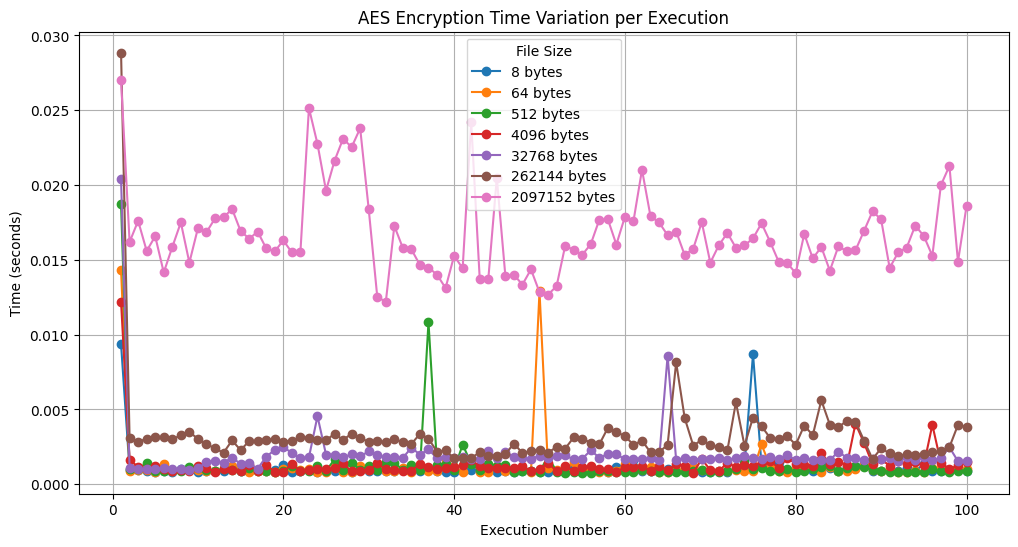

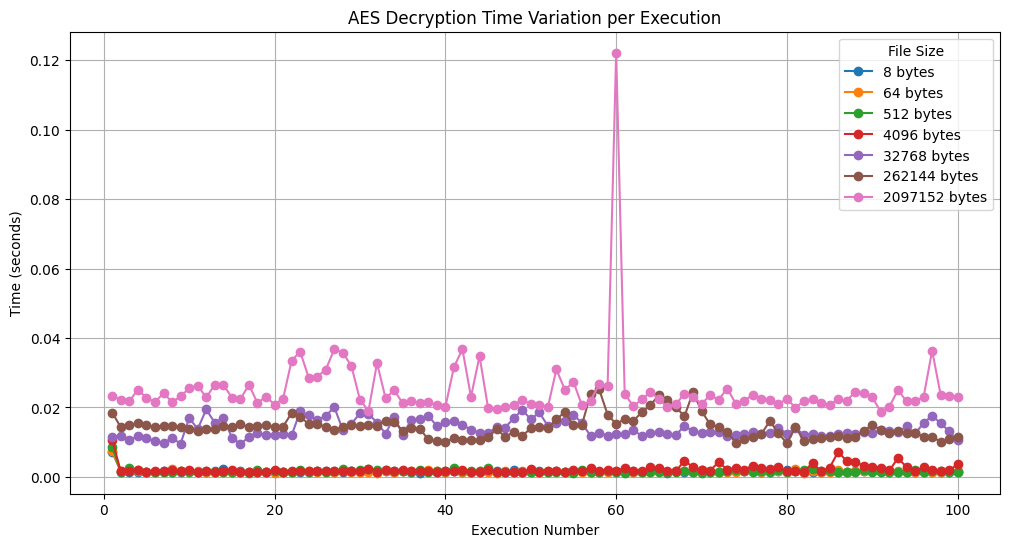

In [35]:
def encrypt_file_aes(input_file, output_file, key,iv):
    with open(input_file, 'rb') as f:
        plaintext = f.read()
    padded_plaintext = pad(plaintext, algorithms.AES.block_size)
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    encrypted_data = encryptor.update(padded_plaintext) + encryptor.finalize()
    with open(output_file, 'wb') as f:
        f.write(encrypted_data)

def decrypt_file_aes(input_file, key, iv):
    with open(input_file, 'rb') as f:
        encrypted_data = f.read()
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    decryptor = cipher.decryptor()
    decrypted_data = decryptor.update(encrypted_data) + decryptor.finalize()
    # Não é preciso retornar ou modificar o ficheiro. 



def pad(data, block_size):
    padding_length = block_size - (len(data) % block_size)
    return data + bytes([padding_length] * padding_length)

# Key for AES encryption and decryption (256-bit key)
key = os.urandom(32) 

# Encrypt and decrypt each file size
def Measure_Time_AES(file_sizes_aes):
    encryption_times = {size: [] for size in file_sizes_aes}
    decryption_times = {size: [] for size in file_sizes_aes}
    num_runs = 100
    key = os.urandom(32)
    iv = os.urandom(16)
    for size in file_sizes_aes:
        for _ in range(num_runs):
            input_file = f"aes_{size}.txt"
            encrypted_file = f"aes_{size}_encrypted.txt"
            
            # Measure encryption time
            encryption_time = timeit.timeit(lambda: encrypt_file_aes(input_file, encrypted_file, key, iv), number=1)
            encryption_times[size].append(encryption_time)
            
            # Measure decryption time
            decryption_time = timeit.timeit(lambda: decrypt_file_aes(encrypted_file, key, iv), number=1)
            decryption_times[size].append(decryption_time)

    # Plotting encryption times
    plt.figure(figsize=(12, 6))
    for size in file_sizes_aes:
        plt.plot(np.arange(1, num_runs + 1), encryption_times[size], '-o', label=f'{size} bytes')
    plt.xlabel('Execution Number')
    plt.ylabel('Time (seconds)')
    plt.title('AES Encryption Time Variation per Execution')
    plt.legend(title="File Size")
    plt.grid(True)
    plt.show()

    # Plotting decryption times
    plt.figure(figsize=(12, 6))
    for size in file_sizes_aes:
        plt.plot(np.arange(1, num_runs + 1), decryption_times[size], '-o', label=f'{size} bytes')
    plt.xlabel('Execution Number')
    plt.ylabel('Time (seconds)')
    plt.title('AES Decryption Time Variation per Execution')
    plt.legend(title="File Size")
    plt.grid(True)
    plt.show()

            
Measure_Time_AES(file_sizes_aes)





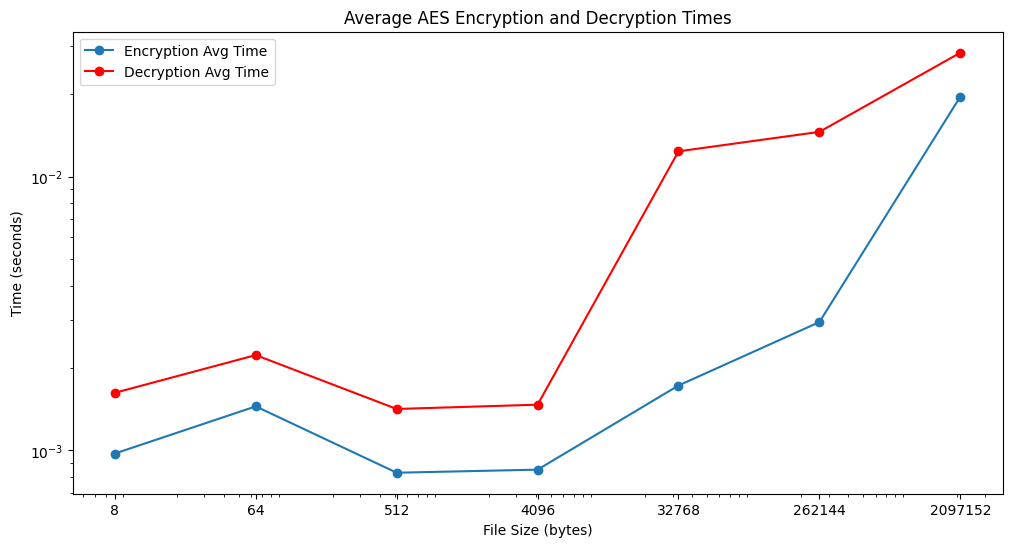

In [43]:
def Measure_And_Plot_Avg_AES(file_sizes_aes):
    encryption_times_avg = {}
    decryption_times_avg = {}
    num_runs = 200
    key = os.urandom(32)
    iv = os.urandom(16)
    for size in file_sizes_aes:
        encryption_times = []
        decryption_times = []
        for _ in range(num_runs):
            input_file = f"aes_{size}.txt"
            encrypted_file = f"aes_{size}_encrypted.txt"
            
            # Measure encryption time
            encryption_time = timeit.timeit(lambda: encrypt_file_aes(input_file, encrypted_file, key, iv), number=1)
            encryption_times.append(encryption_time)
            
            # Measure decryption time
            decryption_time = timeit.timeit(lambda: decrypt_file_aes(encrypted_file, key, iv), number=1)
            decryption_times.append(decryption_time)
        
        # Calculate average
        encryption_times_avg[size] = np.mean(encryption_times)
        decryption_times_avg[size] = np.mean(decryption_times)

    # Preparando dados para plotagem
    sizes = list(encryption_times_avg.keys())
    enc_avg = [encryption_times_avg[size] for size in sizes]
    dec_avg = [decryption_times_avg[size] for size in sizes]

    # Plotting averages
    plt.figure(figsize=(12, 6))
    plt.plot(sizes, enc_avg, '-o', label='Encryption Avg Time')
    plt.plot(sizes, dec_avg, '-o', label='Decryption Avg Time', color='red')
    plt.xlabel('File Size (bytes)')
    plt.ylabel('Time (seconds)')
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(sizes, labels=[str(size) for size in sizes])  # Ajusta rótulos do eixo x
    plt.title('Average AES Encryption and Decryption Times')
    plt.legend()
    
    plt.show() 


Measure_And_Plot_Avg_AES(file_sizes_aes)

Como podemos verificar, há um maior variacao na encriptacao e decriptacao em ficheiros maiores.

In [37]:
def generate_multiple_files(file_sizes_aes, num_files=10):
    for size in file_sizes_aes:
        for i in range(num_files):
            file_name = f'aes_{size}_{i}.txt'
            with open(file_name, 'wb') as f:
                f.write(os.urandom(size))

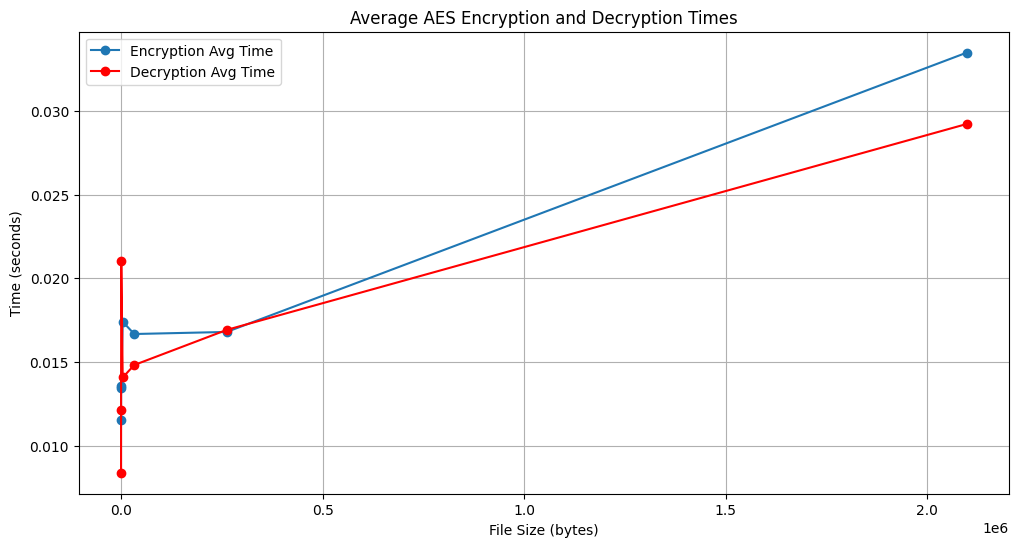

In [42]:
def Measure_And_Plot_Avg_AES(file_sizes_aes, num_files=15):
    encryption_times_avg = {}
    decryption_times_avg = {}
    key = os.urandom(32)
    iv = os.urandom(16)
    for size in file_sizes_aes:
        encryption_times = []
        decryption_times = []
        
        for i in range(num_files):
            input_file = f'aes_{size}_{i}.txt'
            encrypted_file = f'aes_{size}_{i}_encrypted.txt'
            
            # Measure encryption time
            encryption_time = timeit.timeit(lambda: encrypt_file_aes(input_file, encrypted_file, key,iv), number=1)
            encryption_times.append(encryption_time)
            
            # Measure decryption time
            decryption_time = timeit.timeit(lambda: decrypt_file_aes(encrypted_file, key, iv), number=1)
            decryption_times.append(decryption_time)

        # Calculate average
        encryption_times_avg[size] = np.mean(encryption_times)
        decryption_times_avg[size] = np.mean(decryption_times)

    # Plotting the results
    sizes = list(encryption_times_avg.keys())
    enc_avg = [encryption_times_avg[size] for size in sizes]
    dec_avg = [decryption_times_avg[size] for size in sizes]

    plt.figure(figsize=(12, 6))
    plt.plot(sizes, enc_avg, '-o', label='Encryption Avg Time')
    plt.plot(sizes, dec_avg, '-o', label='Decryption Avg Time', color='red')
    plt.xlabel('File Size (bytes)')
    plt.ylabel('Time (seconds)')
    plt.title('Average AES Encryption and Decryption Times')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate files
generate_multiple_files(file_sizes_aes,15)

# Now measure and plot
Measure_And_Plot_Avg_AES(file_sizes_aes)

-------------------------------------------------------------------------------------------------------------------------------------

C. Using the python module for RSA encryption and decryption, measure the time of RSA encryption and decryption
for the file sizes listed in part A, with a key of size 2048 bits (minimum recommended for RSA).

-------------------------------------------------------------------------------------------------------------------------------------

D. Measure the time for SHA-256 hash generation for the file sizes listed in part a.

In [39]:
import time
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives import serialization
from cryptography.hazmat.primitives.asymmetric import padding
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
import os

def time_aes(file_sizes):
    backend = default_backend()
    key = os.urandom(32)  # 256-bit key
    iv = os.urandom(16)   # 128-bit IV
    times = []
    for size in file_sizes:
        data = generate_random_text_file(size)
        start_time = time.time()
        cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=backend)
        encryptor = cipher.encryptor()
        ciphertext = encryptor.update(data) + encryptor.finalize()
        decryptor = cipher.decryptor()
        plaintext = decryptor.update(ciphertext) + decryptor.finalize()
        end_time = time.time()
        times.append(end_time - start_time)
    return times

def time_sha(file_sizes):
    times = []
    for size in file_sizes:
        data = generate_random_text_file(size)
        start_time = time.time()
        hash_obj = hashes.Hash(hashes.SHA256())
        hash_obj.update(data)
        hash_result = hash_obj.finalize()
        end_time = time.time()
        times.append(end_time - start_time)
    return times

def time_rsa(file_sizes):
    private_key = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048,
        backend=default_backend()
    )
    public_key = private_key.public_key()
    times = []
    for size in file_sizes:
        data = generate_random_text_file(size)
        start_time = time.time()
        ciphertext = public_key.encrypt(
            data,
            padding.OAEP(
                mgf=padding.MGF1(algorithm=hashes.SHA256()),
                algorithm=hashes.SHA256(),
                label=None
            )
        )
        plaintext = private_key.decrypt(
            ciphertext,
            padding.OAEP(
                mgf=padding.MGF1(algorithm=hashes.SHA256()),
                algorithm=hashes.SHA256(),
                label=None
            )
        )
        end_time = time.time()
        times.append(end_time - start_time)
    return times


print("AES Times:", time_aes(file_sizes_aes))
print("SHA Times:", time_sha(file_sizes_sha))
print("RSA Times:", time_rsa(file_sizes_rsa))


ValueError: The length of the provided data is not a multiple of the block length.

-------------------------------------------------------------------------------------------------------------------------------------

E. Prepare a report of your observations, including the following information:
- Code implemented for points b., c., and d. above
- Brief explanation of the main components of the code (the rest should be submitted in a separate compressed
file)
- Explain how you generated/obtained the results – must be statistically significant. This must include a
description of the experimental setup (e.g. computer characteristics, OS, software versions).
- Plots showing: (i) AES encryption/decryption times; (ii) RSA encryption times; (iii) RSA decryption times;
and (iv) SHA digests generation times (plots can be combined for easier comparison). In these graphs, the
X axis should plot the file sizes in units of bytes, and the Y axis should plot time measurements in units of
microseconds (us).
1
- The report should also analyze and explain the performance results of:
    - Comparison between AES encryption and RSA encryption.
    - Comparison between AES encryption and SHA digest generation.
    - Comparison between RSA encryption and decryption times.